# **Análisis de los datos de PM10 y PM 2.5**

## **Extracción, transformación y carga (ETL)**

En la parte superior cargaremos los paquetes

In [33]:
# Cargar paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Carguemos los datos recopilados para realizar los análisis

In [3]:
# Cargar los datos
datos_recopilados = pd.read_excel('C:/Users/cdeor/OneDrive/Documentos/Python/jb_aet_pm10_25/docs/_data/data_1.xlsx')

# Renombrar las columnas
datos_recopilados.rename(columns={
    'Estacion': 'Estacion',
    'Fecha inicial': 'Fecha',
    'PARÁMETRO': 'Parametro',
    'CONCENTRACIÓN mg/m3': 'Concentración_mg/m3'
}, inplace=True)

datos_recopilados.head(5)

,Estacion,Fecha,Parametro,Concentración_mg/m3
0,LA GLORIA,2022-12-21 00:00:00,PM 10,40.69
1,LA GLORIA,2022-12-20 00:00:00,PM 10,41.01
2,LA GLORIA,2022-12-19 00:00:00,PM 10,40.94
3,LA GLORIA,2022-12-18,PM 10,39.87
4,LA GLORIA,2022-12-17,PM 10,38.79


* Ajustemos la fecha como `datetime`:

In [4]:
# Convertir la columna "Fecha" a formato datetime
datos_recopilados['Fecha'] = pd.to_datetime(datos_recopilados['Fecha'], dayfirst=True)

# Mostrar los datos para verificar
datos_recopilados.head(5)

,Estacion,Fecha,Parametro,Concentración_mg/m3
0,LA GLORIA,2022-12-21,PM 10,40.69
1,LA GLORIA,2022-12-20,PM 10,41.01
2,LA GLORIA,2022-12-19,PM 10,40.94
3,LA GLORIA,2022-12-18,PM 10,39.87
4,LA GLORIA,2022-12-17,PM 10,38.79


* Información de los datos de recopilación

In [5]:
datos_recopilados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Estacion             1352 non-null   object        
 1   Fecha                1352 non-null   datetime64[ns]
 2   Parametro            1352 non-null   object        
 3   Concentración_mg/m3  1352 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 42.4+ KB


* Carguemos los datos de parámetros

In [6]:
# Cargar los datos
datos_parametros = pd.read_excel('C:/Users/cdeor/OneDrive/Documentos/Python/jb_aet_pm10_25/docs/_data/parametros.xlsx')

# Eliminar las columnas especificadas
datos_parametros = datos_parametros.drop(columns=['Unnamed: 1', 'Unnamed: 3'])

# Renombrar las columnas
datos_parametros.rename(columns={
    'FECHA ': 'Fecha',
    'VALOR': 'Valor',
    'UNIDAD': 'Unidad',
    'PARAMETRO': 'Parametros_climaticos'
}, inplace=True)

# Convertir la columna "Fecha" a formato datetime
datos_parametros['Fecha'] = pd.to_datetime(datos_parametros['Fecha'], format='%Y-%m-%d %H:%M', errors='coerce')

datos_parametros.head()

,Fecha,Valor,Unidad,Parametros_climaticos
0,2020-06-17,249.907970,Grados (°),Dirección Viento
1,2020-06-18,106.967656,Grados (°),Dirección Viento
2,2020-06-19,352.443983,Grados (°),Dirección Viento
3,2020-06-20,161.221664,Grados (°),Dirección Viento
4,2020-06-21,192.649780,Grados (°),Dirección Viento


* Información de los datos de parámetros

In [7]:
datos_parametros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  5171 non-null   datetime64[ns]
 1   Valor                  5171 non-null   float64       
 2   Unidad                 5171 non-null   object        
 3   Parametros_climaticos  5171 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 161.7+ KB


* Unamos los datos recopilados y los datos de parámetros

In [8]:
# Unir los DataFrames por la columna "Fecha" usando un merge (right join para mantener todos los datos de df_recopilacion)
df = pd.merge(datos_parametros, datos_recopilados, on='Fecha', how='right')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  4951 non-null   datetime64[ns]
 1   Valor                  4951 non-null   float64       
 2   Unidad                 4951 non-null   object        
 3   Parametros_climaticos  4951 non-null   object        
 4   Estacion               4951 non-null   object        
 5   Parametro              4951 non-null   object        
 6   Concentración_mg/m3    4951 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


* Veamos si todos los días mediciones de PM 10 y PM 2.5

In [9]:
# Agrupar por fecha y contar las ocurrencias de PM10 y PM2.5
df_grouped = df.groupby('Fecha')['Parametro'].value_counts().unstack().fillna(0)
# df_grouped

# Crear una columna booleana indicando si ambos valores están presentes en fechas consecutivas
df_grouped['Ambos_presentes_consecutivos'] = (df_grouped['PM 10'] > 0) & (df_grouped['PM 2.5'] > 0)

# Filtrar para obtener las fechas donde ambos valores no están presentes en fechas consecutivas
fechas_sin_coincidencia = df_grouped[~df_grouped['Ambos_presentes_consecutivos']].index

# Imprimir los resultados
print("Coinciden:", df_grouped[df_grouped['Ambos_presentes_consecutivos']].index.tolist())
print("No coinciden:", fechas_sin_coincidencia.tolist())

Coinciden: [Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-09-17 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2020-09-19 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-09-21 00:00:00'), Timestamp('2020-09-22 00:00:00'), Timestamp('2020-09-23 00:00:00'), Timestamp('2020-09-24 00:00:00'), Timestamp('2020-09-25 00:00:00'), Timestamp('2020-09-26 00:00:00'), Timestamp('2020-09-27 00:00:00'), Timestamp('2020-09-28 00:00:00'), Timestamp('2020-09-29 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-02 00:00:00'), Timestamp('2020-10-03 00:00:00'), Timestamp('2020-10-04 00:00:00'), Timestamp('2021-09-25 00:00:00'), Timestamp('2021-09-26 00:00:00'), Timestamp('2021-09-27 00:00:00'), Timestamp('2021-09-28 00:00:00'), Timestamp('2021-09-29 00:00:00'), Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-01 00:00:00'), Timestamp('2021-10-02 00:00:00'), Timestamp('2021-10-03 00:00:00'), Ti

In [10]:
# Contar el número de fechas donde ambos valores no están presentes en fechas consecutivas
num_no_coincidencias = df_grouped[~df_grouped['Ambos_presentes_consecutivos']].shape[0]

print("Número de fechas donde no coinciden:", num_no_coincidencias)

Número de fechas donde no coinciden: 198


* Indexando la fecha para futuras mediciones

In [11]:
df_2 = df.set_index('Fecha')
df_2.head()

,Valor,Unidad,Parametros_climaticos,Estacion,Parametro,Concentración_mg/m3
Fecha,,,,,,
2022-12-21,291.021497,Grados (°),Dirección Viento,LA GLORIA,PM 10,40.69
2022-12-21,98.000000,%,Humedad,LA GLORIA,PM 10,40.69
2022-12-21,32.301221,°C,Temp. Maxima,LA GLORIA,PM 10,40.69
2022-12-21,30.796568,°C,Temp. Mínima,LA GLORIA,PM 10,40.69
2022-12-21,1.852968,m/s,Velocidad Viento,LA GLORIA,PM 10,40.69


### **Datos faltantes para el PM 10**

* Miraremos los datos faltantes para el PM 10

In [15]:
df_pm_10 = datos_recopilados[datos_recopilados['Parametro']=='PM 10']
df_pm_10 = df_pm_10.drop_duplicates(subset=['Fecha','Estacion'], keep='first')

df_pm_10.head()

,Estacion,Fecha,Parametro,Concentración_mg/m3
0,LA GLORIA,2022-12-21,PM 10,40.69
1,LA GLORIA,2022-12-20,PM 10,41.01
2,LA GLORIA,2022-12-19,PM 10,40.94
3,LA GLORIA,2022-12-18,PM 10,39.87
4,LA GLORIA,2022-12-17,PM 10,38.79


* Veamos la fecha de inicio y final de la toma de los datos

In [16]:
# Crear un nuevo índice con todas las fechas del mes de septiembre de 2020
fecha_inicio = df_pm_10['Fecha'].min()
fecha_fin = df_pm_10['Fecha'].max()

print(' Fecha de inicio', fecha_inicio)
print(' Fecha de final', fecha_fin)

 Fecha de inicio 2020-09-01 00:00:00
 Fecha de final 2023-12-21 00:00:00


* Ingreso de las fechas faltantes del PM 10

In [17]:
# Crear un índice de fechas continuo
nuevo_indice = pd.date_range(start=fecha_inicio, end=fecha_fin)

# Crear un DataFrame vacío para almacenar los resultados
df_res_pm10 = pd.DataFrame()

# Reindexar por cada estación
for estacion, grupo in df_pm_10.groupby('Estacion'):
    # Reindexar el grupo utilizando el rango de fechas
    grupo_reindexado = (
        grupo.set_index('Fecha')
        .reindex(nuevo_indice)
        .reset_index()
    )
    # Asignar el nombre de la estación al grupo reindexado
    grupo_reindexado['Estacion'] = estacion
    # Rellenar los valores faltantes en "Parametro"
    grupo_reindexado['Parametro'] = grupo_reindexado['Parametro'].fillna('PM 10')
    # Renombrar la columna del índice
    grupo_reindexado.rename(columns={'index': 'Fecha'}, inplace=True)
    # Añadir al DataFrame final
    df_res_pm10 = pd.concat([df_res_pm10, grupo_reindexado], ignore_index=True)

# Verificar el resultado
df_res_pm10.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                4828 non-null   datetime64[ns]
 1   Estacion             4828 non-null   object        
 2   Parametro            4828 non-null   object        
 3   Concentración_mg/m3  1012 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 151.0+ KB


In [18]:
df_va = df_res_pm10.copy()

# Contar la cantidad de datos totales por estación
cantidad_datos_por_estacion = df_va.groupby('Estacion').size().reset_index(name='Cantidad de Datos')

# Contar la cantidad de datos no faltantes en "Concentración_mg/m3" por estación
datos_no_faltantes = df_va.groupby('Estacion')['Concentración_mg/m3'].apply(lambda x: x.notnull().sum()).reset_index(name='Cantidad de datos del PM 10 (no faltantes)')

# Revisar los datos faltantes por estación
missing_values_by_estacion = df_va.groupby('Estacion').apply(lambda x: x.isnull().sum())

# Calcular el porcentaje de valores faltantes por estación
missing_percentage_by_estacion = df_va.groupby('Estacion').apply(lambda x: (x.isnull().mean() * 100).round(2))

# Crear un DataFrame unificado
missing_data_by_estacion = cantidad_datos_por_estacion.copy()
missing_data_by_estacion = missing_data_by_estacion.merge(datos_no_faltantes, on='Estacion', how='left')
missing_data_by_estacion['Valores Faltantes'] = missing_values_by_estacion['Concentración_mg/m3'].values
missing_data_by_estacion['Porcentaje Faltante (%)'] = missing_percentage_by_estacion['Concentración_mg/m3'].values

missing_data_by_estacion

,Estacion,Cantidad de Datos,Cantidad de datos del PM 10 (no faltantes),Valores Faltantes,Porcentaje Faltante (%)
0,LA GLORIA,1207,255,952,78.87
1,TERMINAL,1207,252,955,79.12
2,UNISINU,1207,252,955,79.12
3,UPB,1207,253,954,79.04


:::{admonition} **Interpretación de la tabla**
:class: tip

La tabla muestra un análisis de datos faltantes para cuatro estaciones diferentes (LA GLORIA, TERMINAL, UNISINU, UPB) en relación con la medición del parámetro **PM 10**:

1. **Cantidad total de datos**:
   - Cada estación tiene 1207 observaciones totales (filas), lo que indica un período de tiempo uniforme cubierto para todas las estaciones.

2. **Cantidad de datos del PM 10 (no faltantes)**:
   - Los datos completos (no faltantes) para el parámetro **PM 10** son significativamente menores:
     - **LA GLORIA**: 255 observaciones (21.13% de los datos disponibles).
     - **TERMINAL**: 252 observaciones (20.88% de los datos disponibles).
     - **UNISINU**: 252 observaciones (20.88% de los datos disponibles).
     - **UPB**: 253 observaciones (20.96% de los datos disponibles).

3. **Valores faltantes**:
   - El número de valores faltantes para **PM 10** es alto:
     - Entre 952 y 955 valores faltantes por estación.
     - Esto representa aproximadamente el **79% de los datos totales** en todas las estaciones.

4. **Porcentaje faltante (%)**:
   - En todas las estaciones, el porcentaje de valores faltantes ronda el **79%**, lo que significa que los datos son muy incompletos para el parámetro **PM 10**.

:::

* Veamos el gráfico de datos faltantes del PM 10

<Axes: >

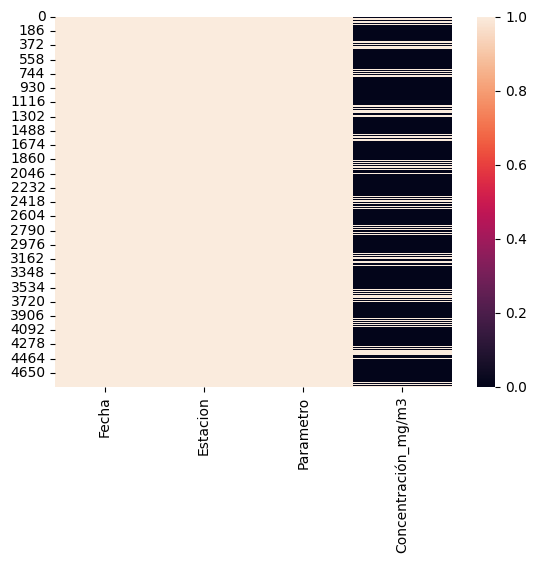

In [41]:
sns.heatmap(df_res_pm10.notna())

* Ahora, realicemos el gráfico de lineas de la fecha con respecto al PM10 según la estación, para los datos faltantes

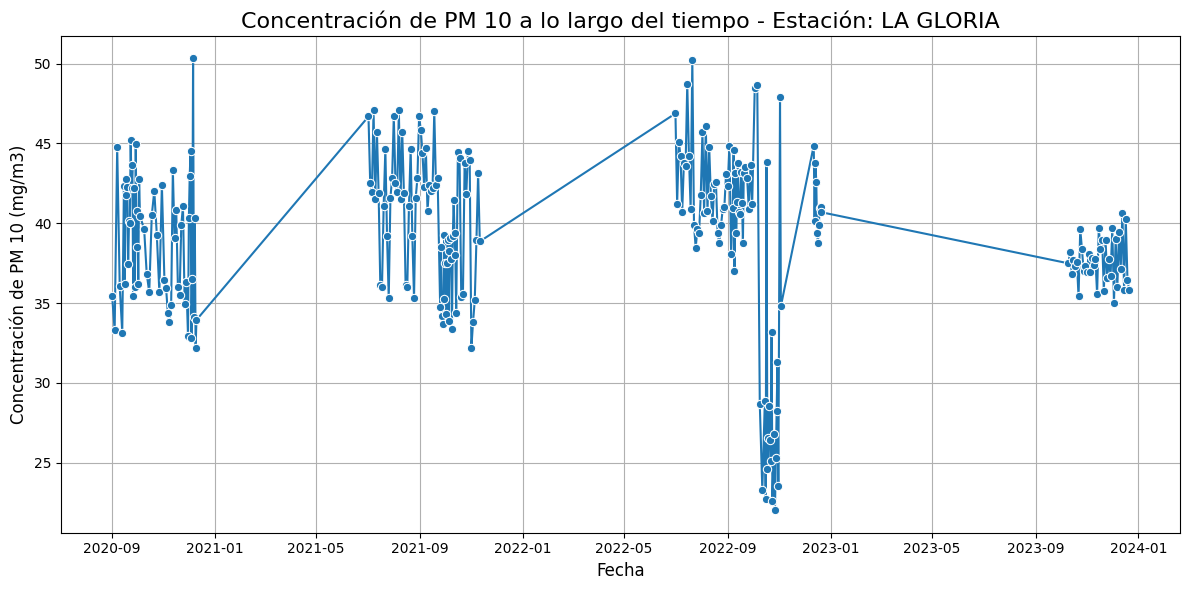

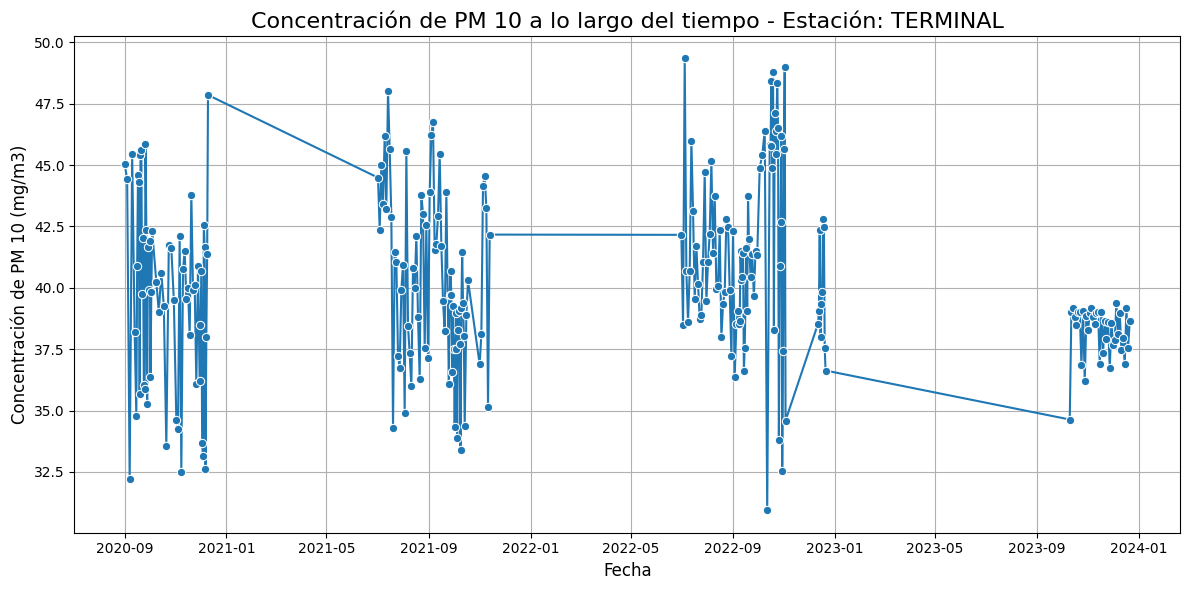

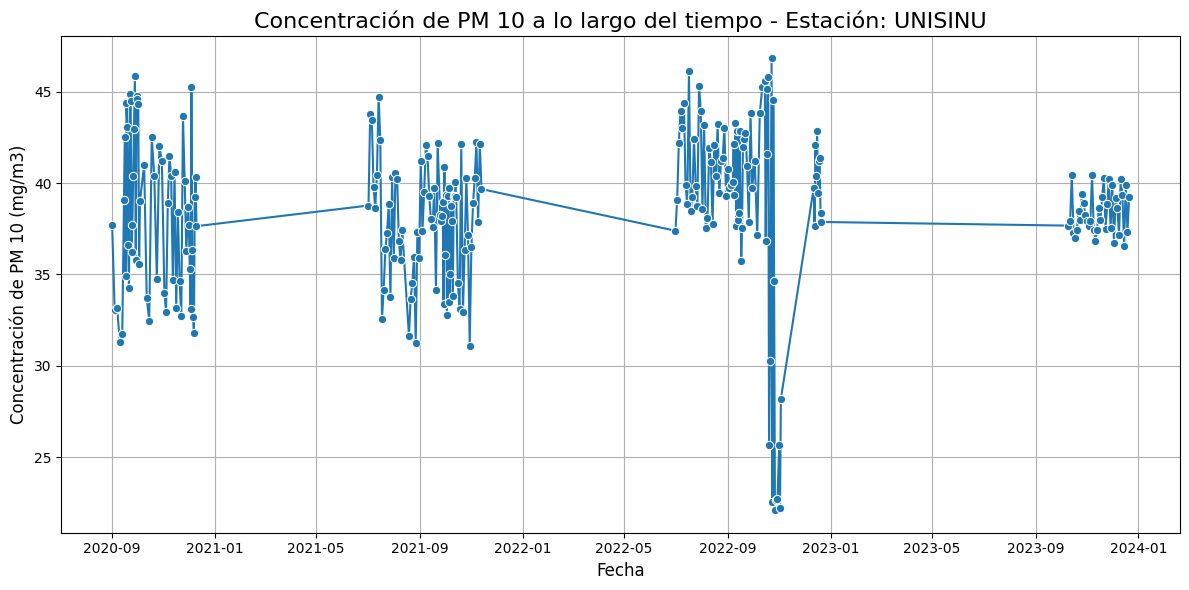

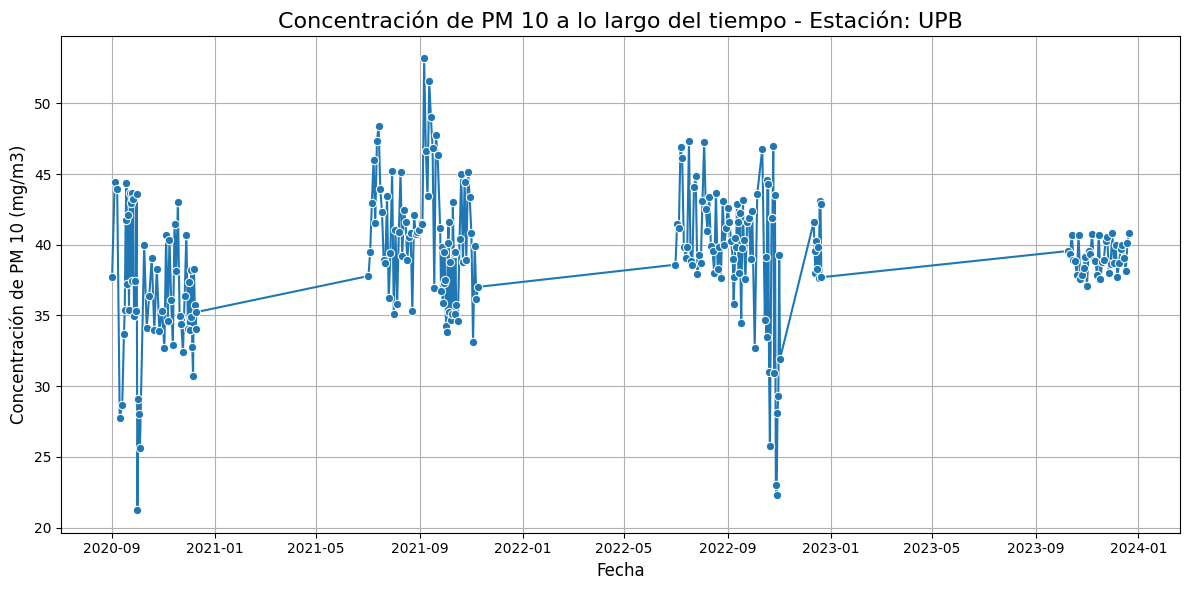

In [46]:
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

# Obtener la lista única de estaciones
estaciones = df_res_pm10['Estacion'].unique()

# Crear un gráfico para cada estación
for estacion in estaciones:
    # Filtrar los datos para la estación actual
    df_estacion = df_res_pm10[df_res_pm10['Estacion'] == estacion]
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))
    
    # Crear el gráfico de líneas
    sns.lineplot(data=df_estacion, x='Fecha', y='Concentración_mg/m3', marker='o')
    
    # Configurar etiquetas y título
    plt.title(f'Concentración de PM 10 a lo largo del tiempo - Estación: {estacion}', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Concentración de PM 10 (mg/m3)', fontsize=12)
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

:::{admonition} **Interpretación de las gráficas por estación para PM 10**
:class: tip

Esta son las interpretaciones de las series según las estaciones

1. **Estación: LA GLORIA**
    - **Patrones de datos**:
        - Se observa una tendencia general de valores de PM 10 oscilando entre **35 mg/m³ y 45 mg/m³**.
        - Hay gaps significativos en los datos en diferentes periodos, como entre finales de 2021 y mediados de 2022, y otro hacia finales de 2023.
    - **Picos notables**:
        - Existen algunos picos por encima de **45 mg/m³**, lo que podría indicar eventos de contaminación específicos o anomalías en la recolección de datos.

2. **Estación: TERMINAL**
    - **Patrones de datos**:
        - Los valores de PM 10 están distribuidos entre **35 mg/m³ y 45 mg/m³**, con algunos picos cercanos a **50 mg/m³**.
        - Hay períodos significativos sin datos (gaps) en 2022 y 2023, similares a los de LA GLORIA.
    - **Variabilidad**:
        - Existe una mayor dispersión en los datos, con variaciones más marcadas que en otras estaciones, especialmente en 2021 y 2022.

3. **Estación: UNISINU**
    - **Patrones de datos**:
        - Los valores de PM 10 muestran menor variabilidad, con la mayoría de los puntos en el rango de **35 mg/m³ a 45 mg/m³**.
        - Los gaps son más frecuentes en 2022 y finales de 2023.
    - **Tendencias generales**:
        - No se observan patrones estacionales claros debido a la discontinuidad en los datos.

4. **Estación: UPB**
    - **Patrones de datos**:
        - Similar a las otras estaciones, los valores de PM 10 oscilan principalmente entre **35 mg/m³ y 45 mg/m³**, con algunos picos que alcanzan los **50 mg/m³**.
        - Los gaps en los datos son evidentes en períodos similares (2022 y finales de 2023).
    - **Mayor estabilidad en ciertos periodos**:
        - Existen períodos con datos más completos, pero no permiten identificar una tendencia clara a largo plazo.


**Conclusiones generales**

1. **Falta de datos continuos**:
   - Todas las estaciones presentan gaps significativos en los datos, lo que dificulta la identificación de patrones estacionales o tendencias a largo plazo.

2. **Valores típicos de PM 10**:
   - Los valores de PM 10 se encuentran mayormente en el rango de **35 mg/m³ a 45 mg/m³**, lo que sugiere un nivel de contaminación moderado en las estaciones analizadas.

3. **Picos de contaminación**:
   - En algunas estaciones, como TERMINAL y UPB, los picos de contaminación por encima de **45 mg/m³** podrían estar relacionados con eventos específicos de contaminación, como tráfico pesado o condiciones meteorológicas.

4. **Dificultad para análisis temporal**:
   - Debido a los gaps en los datos, un análisis temporal robusto requeriría imputación de valores faltantes o el uso de datos complementarios.

**Recomendaciones**

1. **Imputación de valores faltantes**:
   - Aplicar técnicas como interpolación para completar los gaps en los datos.

2. **Monitoreo más constante**:
   - Implementar estrategias para garantizar la continuidad en la recolección de datos en las estaciones.

3. **Análisis por períodos completos**:
   - Enfocarse en períodos con datos más consistentes para analizar posibles tendencias o correlaciones.

4. **Investigación de picos de contaminación**:
   - Identificar las posibles causas de los picos en PM 10, como eventos climáticos o actividades humanas.

:::


### **Datos Faltantes del PM 2.5**

* Miremos los datos faltantes del PM 2.5

In [19]:
df_pm_2_5 = datos_recopilados[datos_recopilados['Parametro']=='PM 2.5']
df_pm_2_5 = df_pm_2_5.drop_duplicates(subset=['Fecha','Estacion'], keep='first')

df_pm_2_5.head()

,Estacion,Fecha,Parametro,Concentración_mg/m3
256,LA GLORIA,2022-11-03,PM 2.5,11.87
257,LA GLORIA,2022-11-02,PM 2.5,13.07
258,LA GLORIA,2022-11-01,PM 2.5,13.84
259,LA GLORIA,2022-10-31,PM 2.5,14.36
260,LA GLORIA,2022-10-30,PM 2.5,12.17


* Ingreso de fechas faltantes del PM 2.5

In [20]:
# Crear un índice de fechas continuo
nuevo_indice = pd.date_range(start=fecha_inicio, end=fecha_fin)

# Crear un DataFrame vacío para almacenar los resultados
df_res_pm_2_5 = pd.DataFrame()

# Reindexar por cada estación
for estacion, grupo in df_pm_2_5.groupby('Estacion'):
    # Reindexar el grupo utilizando el rango de fechas
    grupo_reindexado = (
        grupo.set_index('Fecha')
        .reindex(nuevo_indice)
        .reset_index()
    )
    # Asignar el nombre de la estación al grupo reindexado
    grupo_reindexado['Estacion'] = estacion
    # Rellenar los valores faltantes en "Parametro"
    grupo_reindexado['Parametro'] = grupo_reindexado['Parametro'].fillna('PM 10')
    # Renombrar la columna del índice
    grupo_reindexado.rename(columns={'index': 'Fecha'}, inplace=True)
    # Añadir al DataFrame final
    df_res_pm_2_5 = pd.concat([df_res_pm_2_5, grupo_reindexado], ignore_index=True)

# Verificar el resultado
df_res_pm_2_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                4828 non-null   datetime64[ns]
 1   Estacion             4828 non-null   object        
 2   Parametro            4828 non-null   object        
 3   Concentración_mg/m3  338 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 151.0+ KB


In [21]:
df_va = df_res_pm_2_5.copy()

# Contar la cantidad de datos totales por estación
cantidad_datos_por_estacion = df_va.groupby('Estacion').size().reset_index(name='Cantidad de Datos')

# Contar la cantidad de datos no faltantes en "Concentración_mg/m3" por estación
datos_no_faltantes = df_va.groupby('Estacion')['Concentración_mg/m3'].apply(lambda x: x.notnull().sum()).reset_index(name='Cantidad de datos del PM 2.5 (no faltantes)')

# Revisar los datos faltantes por estación
missing_values_by_estacion = df_va.groupby('Estacion').apply(lambda x: x.isnull().sum())

# Calcular el porcentaje de valores faltantes por estación
missing_percentage_by_estacion = df_va.groupby('Estacion').apply(lambda x: (x.isnull().mean() * 100).round(2))

# Crear un DataFrame unificado
missing_data_by_estacion = cantidad_datos_por_estacion.copy()
missing_data_by_estacion = missing_data_by_estacion.merge(datos_no_faltantes, on='Estacion', how='left')
missing_data_by_estacion['Valores Faltantes'] = missing_values_by_estacion['Concentración_mg/m3'].values
missing_data_by_estacion['Porcentaje Faltante (%)'] = missing_percentage_by_estacion['Concentración_mg/m3'].values

missing_data_by_estacion

,Estacion,Cantidad de Datos,Cantidad de datos del PM 2.5 (no faltantes),Valores Faltantes,Porcentaje Faltante (%)
0,LA GLORIA,1207,78,1129,93.54
1,TERMINAL,1207,93,1114,92.29
2,UNISINU,1207,78,1129,93.54
3,UPB,1207,89,1118,92.63


:::{admonition} **Interpretación de la tabla**
:class: tip

La tabla muestra un análisis de los datos disponibles y faltantes del parámetro **PM 2.5** para cuatro estaciones: **LA GLORIA**, **TERMINAL**, **UNISINU** y **UPB**.

1. **Cantidad Total de Datos**
  - Cada estación tiene un total de **1207 observaciones**, lo que indica un período de monitoreo uniforme para todas las estaciones.

2. **Cantidad de Datos No Faltantes (PM 2.5)**
  - Los datos completos (no faltantes) para **PM 2.5** son extremadamente bajos:
    - **LA GLORIA**: 78 observaciones (6.46% de los datos totales).
    - **TERMINAL**: 93 observaciones (7.71% de los datos totales).
    - **UNISINU**: 78 observaciones (6.46% de los datos totales).
    - **UPB**: 89 observaciones (7.37% de los datos totales).

3. **Valores Faltantes**
  - El número de datos faltantes es muy alto en todas las estaciones:
    - **LA GLORIA** y **UNISINU** tienen **1129 valores faltantes** (93.54% de los datos totales).
    - **TERMINAL** tiene **1114 valores faltantes** (92.29% de los datos totales).
    - **UPB** tiene **1118 valores faltantes** (92.63% de los datos totales).

4. **Porcentaje de Datos Faltantes**
  - El porcentaje de datos faltantes supera el **92% en todas las estaciones**, lo que indica una gran discontinuidad en la recolección de datos para este parámetro.
:::

* Ahora, realizaremos la serie del PM 2.5 según cada estación, para mirar los datos faltantes

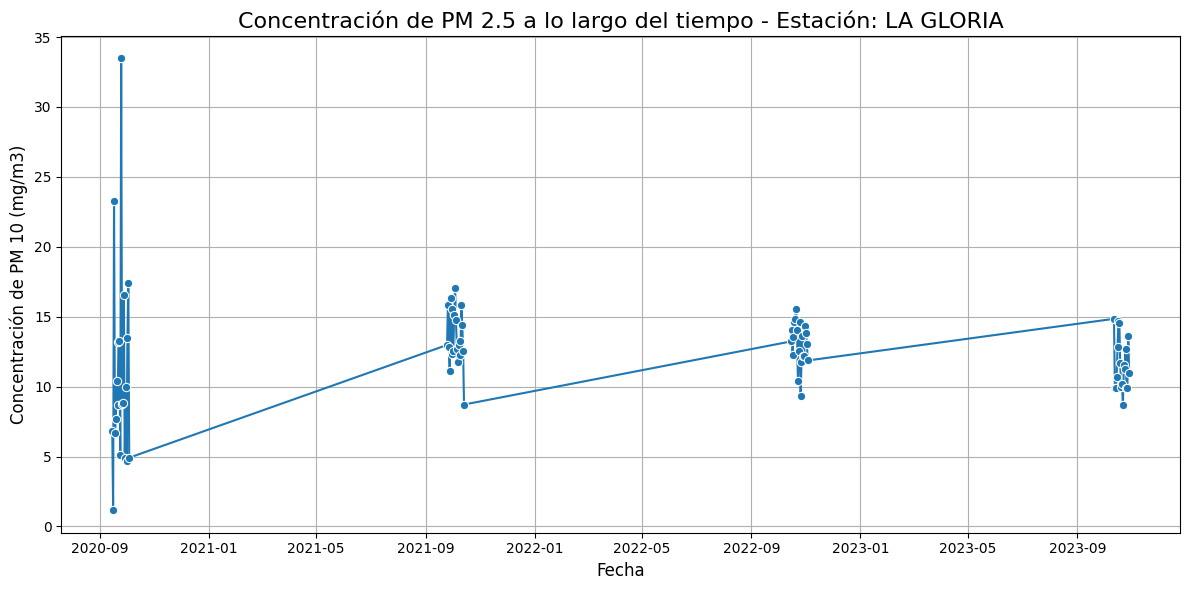

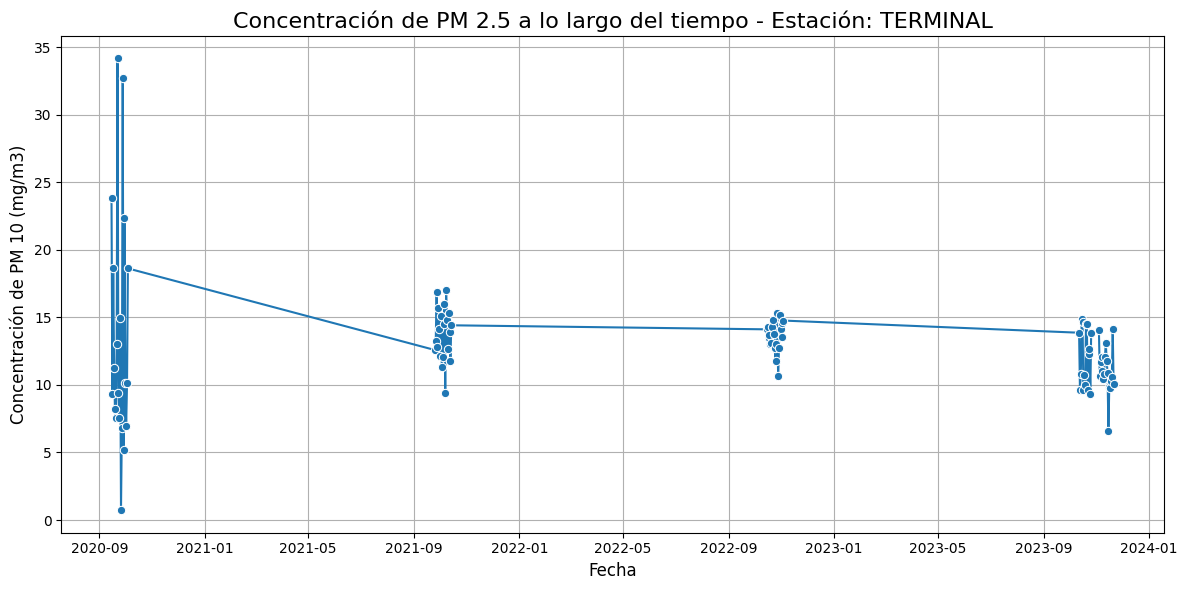

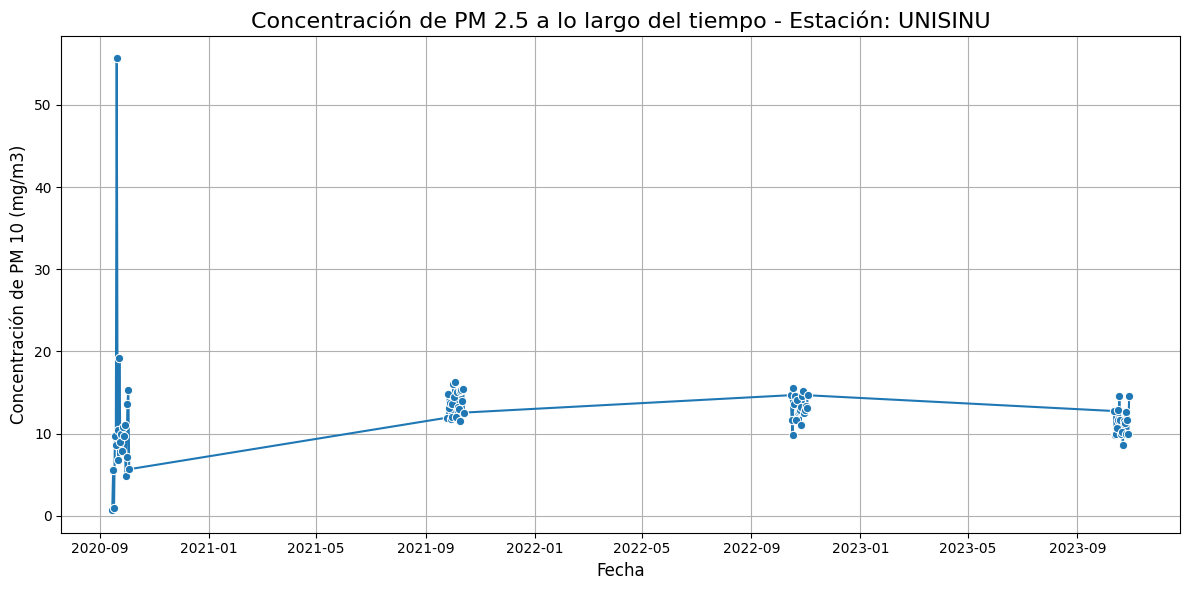

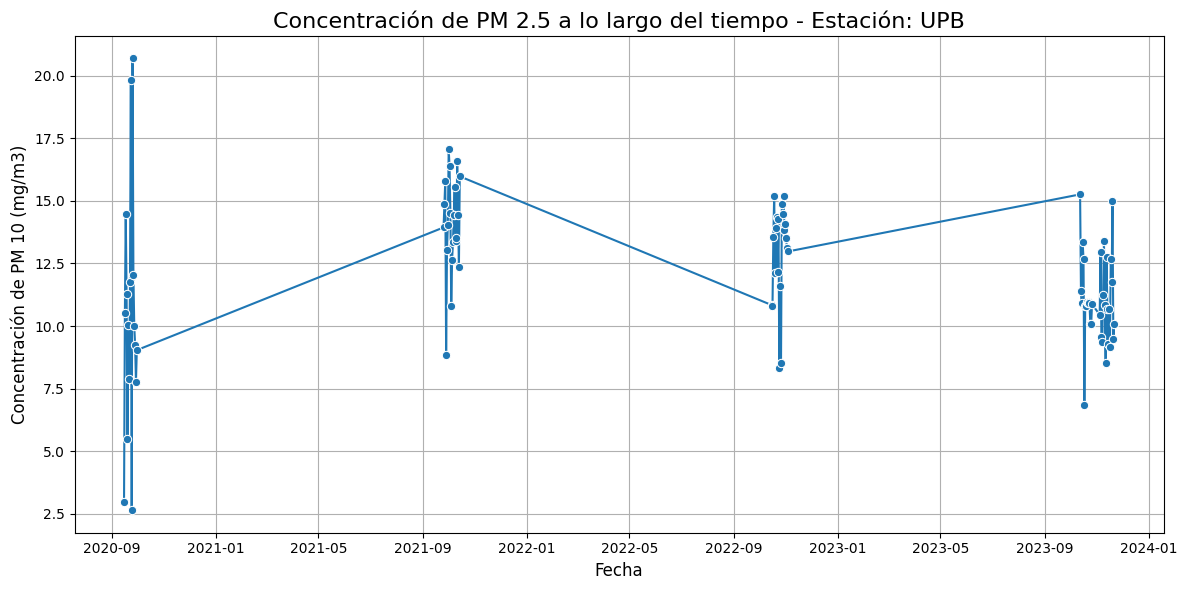

In [47]:
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

# Obtener la lista única de estaciones
estaciones = df_res_pm_2_5['Estacion'].unique()

# Crear un gráfico para cada estación
for estacion in estaciones:
    # Filtrar los datos para la estación actual
    df_estacion = df_res_pm_2_5[df_res_pm_2_5['Estacion'] == estacion]
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))
    
    # Crear el gráfico de líneas
    sns.lineplot(data=df_estacion, x='Fecha', y='Concentración_mg/m3', marker='o')
    
    # Configurar etiquetas y título
    plt.title(f'Concentración de PM 2.5 a lo largo del tiempo - Estación: {estacion}', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Concentración de PM 10 (mg/m3)', fontsize=12)
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

:::{admonition} **Interpretación de las gráficas por estación para PM 2.5**
:class: tip

Esta son las interpretaciones de las series según las estaciones

1. **Estación: LA GLORIA**
  - **Patrones de datos**:
    - Los valores de **PM 2.5** presentan **gaps significativos** en la recolección de datos, observándose mediciones en periodos muy específicos.
    - La concentración oscila mayormente entre **5 y 15 mg/m³**, con algunos picos por encima de los **30 mg/m³** al inicio del período.
  - **Tendencia general**:
    - Existe un ligero aumento en las concentraciones de PM 2.5 en las mediciones posteriores a 2021, aunque los datos son limitados para confirmar una tendencia sólida.

2. **Estación: TERMINAL**
  - **Patrones de datos**:
    - Similar a LA GLORIA, hay **gaps significativos** en los datos, con mediciones realizadas en periodos muy específicos.
    - Las concentraciones iniciales alcanzan hasta **20 mg/m³**, mientras que los periodos posteriores muestran valores más estables entre **5 y 15 mg/m³**.
  - **Tendencia general**:
    - Se observa una ligera disminución en las concentraciones promedio a lo largo del tiempo.

3. **Estación: UNISINU**
  - **Patrones de datos**:
    - Presenta menos puntos de datos y grandes gaps temporales.
    - La concentración inicial muestra un pico significativo por encima de **50 mg/m³**, que no se repite en las mediciones posteriores.
    - Las mediciones posteriores están en el rango de **5 a 15 mg/m³**.
  - **Tendencia general**:
    - Se aprecia un comportamiento más estable en los valores recientes, aunque limitado por la falta de continuidad en los datos.

4. **Estación: UPB**
  - **Patrones de datos**:
    - Los valores iniciales muestran mayor variabilidad, con concentraciones de **5 a 20 mg/m³** y algunos picos menores a lo largo del tiempo.
    - Los periodos posteriores presentan valores más estables, oscilando entre **5 y 15 mg/m³**, con gaps similares a otras estaciones.
  - **Tendencia general**:
    - Existe un patrón moderadamente estable en las mediciones recientes.

**Conclusiones generales**

1. **Gaps en los datos**:
   - Todas las estaciones presentan periodos largos sin datos, lo que dificulta realizar un análisis continuo o identificar patrones estacionales claros.

2. **Rango de concentraciones**:
   - Las concentraciones de PM 2.5 generalmente se encuentran entre **5 y 15 mg/m³**, con algunos picos significativos en ciertos periodos iniciales.

3. **Diferencias entre estaciones**:
   - Aunque los valores son similares entre estaciones, algunas como UNISINU muestran picos más altos en las primeras mediciones.

4. **Posibilidad de análisis temporal**:
   - Debido a la alta cantidad de datos faltantes, sería necesario imputar valores para realizar un análisis de tendencias o estacionalidad confiable.

**Recomendaciones**

1. **Imputación de valores faltantes**:
   - Completar los datos ausentes mediante técnicas como interpolación o modelos predictivos basados en variables relacionadas.

2. **Mejorar la recolección de datos**:
   - Implementar medidas para reducir los gaps en los datos futuros y garantizar una recolección más uniforme.

3. **Análisis por periodos específicos**:
   - Centrar el análisis en los periodos donde los datos sean más consistentes.

4. **Investigación de picos iniciales**:
   - Analizar las posibles causas de los picos altos al inicio del periodo (por encima de 30 mg/m³), que podrían estar relacionados con eventos específicos.

:::

### **Unión de los datos PM 10 y PM 2.5 con las fechas completas**

* Unión los dataframe creados

In [22]:
# Supongamos que los DataFrames
df_unido = pd.concat([df_res_pm10, df_res_pm_2_5], ignore_index=True)

# Mostrar información del DataFrame unido
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                9656 non-null   datetime64[ns]
 1   Estacion             9656 non-null   object        
 2   Parametro            9656 non-null   object        
 3   Concentración_mg/m3  1350 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 301.9+ KB


* Hagamos un join entre `df_unido` y `datos_parametros` con las fechas completas

In [27]:
# Unir los DataFrames por la columna "Fecha" usando un merge (right join para mantener todos los datos de df_recopilacion)
df_comp = pd.merge(datos_parametros, df_unido, on='Fecha', how='right')
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34424 entries, 0 to 34423
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  34424 non-null  datetime64[ns]
 1   Valor                  34064 non-null  float64       
 2   Unidad                 34064 non-null  object        
 3   Parametros_climaticos  34064 non-null  object        
 4   Estacion               34424 non-null  object        
 5   Parametro              34424 non-null  object        
 6   Concentración_mg/m3    4947 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.8+ MB


* Grafica de valores faltantes de los datos `df_comp` 

<Axes: >

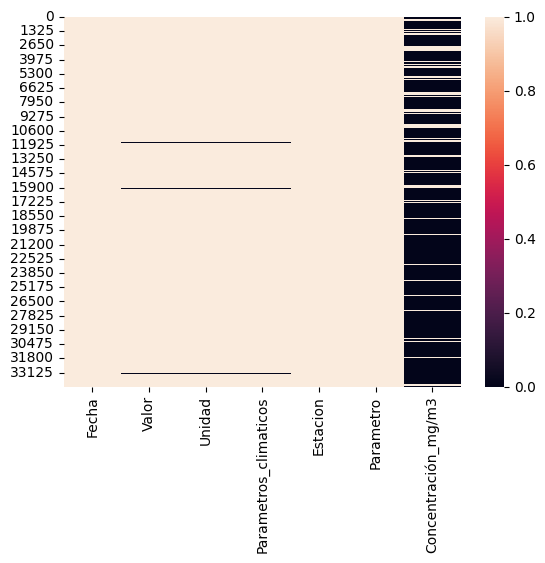

In [28]:
sns.heatmap(df_comp.notna())